In [40]:
best_path = [117,   1, 165, 594, 742, 135, 640, 826, 387, 643, 521, 493, 335,
          30,  33, 490, 937,  23, 870, 631, 114, 346, 663, 267, 970, 716,
          54, 363, 676, 564, 708, 799, 806, 155, 542, 180, 151, 844, 282,
         557, 967, 979, 393, 591, 809, 199, 705,  55, 430, 323, 590,  71,
         770, 654, 517, 855, 780, 612, 303, 497, 624, 128, 504, 311,  66,
         318, 295,  31,  97, 613, 760, 191, 756, 805, 446, 656, 773, 753,
         281, 262,  38, 220, 192, 414, 251, 621, 832, 341, 111, 927, 652,
         907,  79, 600, 934,  60, 861, 420,  92,  43, 350, 944, 190, 277,
         969,   2, 502, 607, 410, 296, 259, 665, 579, 390, 941, 845, 746,
         421, 376, 196, 648, 793, 302, 647, 153, 918, 874,  11, 769, 399,
         956, 792, 642, 239,  74, 536, 270, 243, 273, 324, 405, 161, 134,
         976, 452, 247, 429, 632, 453, 475, 796, 904,  32, 380, 461, 449,
         445, 834, 880, 527, 887, 700, 546, 697, 910, 968, 109, 535, 427,
         112, 831, 764, 565, 436, 883, 673, 458, 331, 434, 743, 544, 476,
          12, 440, 812, 932, 630, 840, 384, 740, 699,  82, 637, 381, 396,
         702, 837, 309,  46, 286, 617, 919, 264, 349, 528, 917, 620, 113,
          25, 326, 231, 193, 333, 235, 684, 690, 522, 523, 118, 278, 483,
         903,   7,  56,   6, 795, 828, 205, 137, 923, 329, 848, 682, 876,
         813, 354, 658, 850, 808, 401, 413,  90, 202, 342, 423, 186, 843,
         479, 428, 368, 611, 738, 291, 892, 581, 935, 592, 866, 365, 131,
         473, 214, 622, 177, 524, 584, 257, 209, 265, 549, 782, 860, 727,
         280, 339, 754, 149, 798, 567, 121, 508, 488, 160, 704,  52, 547,
         626, 696,   4, 514, 484, 541, 550, 745, 200,  65, 102, 655, 778,
         914, 437, 120, 382, 543,  45, 784, 223, 482, 140, 852, 285, 332,
         498, 464,  42, 210, 687, 900, 741, 144, 252, 551, 404, 718, 693,
         378, 249, 133, 106, 408, 130, 276, 361, 747, 110, 675, 598, 351,
         206, 228,  99, 472, 362, 955, 478, 573, 256,  10, 100, 940, 763,
         471,  22, 698, 132, 337, 737, 725, 835, 820, 255, 167, 651, 575,
         800, 185, 588,  84, 304, 468, 327, 915, 755, 406, 886,  98, 691,
         689, 864, 879, 888, 136, 532, 736, 695, 628, 863, 739, 466,  77,
         885, 574, 211, 139, 965, 830, 596, 374, 298, 372, 489, 383, 659,
         703, 417, 287,  14, 431,  24, 343, 856, 373, 171, 608, 585, 854,
          41, 618, 662, 548, 288,  63, 811, 182, 862, 610, 300, 442, 627,
         916, 105, 364,  61, 207, 814,  39, 385, 570, 963,  15, 775, 386,
         533, 707, 978,  89, 807, 356, 320,  50, 971, 174, 310,  94, 317,
         733, 877, 459, 873, 175, 735, 272,  83, 776, 159, 560, 127, 801,
         189,  88, 284, 587, 375, 589, 222, 450, 505, 559, 412, 556, 604,
         213, 115, 803, 949, 456, 601, 884, 184, 891, 225,  27, 163, 957,
         125, 513,  64, 232, 299,  59, 728, 869, 328, 802, 605, 101, 218,
         271, 148, 510, 721, 325,  44, 851, 469, 924, 759, 129, 357, 558,
         882, 871, 400, 881, 701, 878, 389, 260, 289, 124, 443, 534, 553,
         641, 433, 734, 710, 402, 653, 441, 169, 906, 629, 181, 789, 230,
         744,  19, 316, 946, 786,  87, 660, 790, 515, 529, 977, 958, 619,
         953, 593, 411, 720, 706, 352, 187, 146, 952, 959, 229, 586, 797,
         603, 290, 666, 166,  68, 241, 338, 723, 898, 215, 477, 279, 409,
         499,  73, 301, 563, 692, 823,  16, 424, 945, 606, 176, 552, 661,
         719, 520,  48, 752, 313, 875,  49,  86, 518, 519, 104, 516, 388,
         962, 457, 312, 686, 419, 960, 677, 933, 939, 391,  96, 688, 494,
         370, 905,  13, 168, 847,  78, 322, 649, 713, 787,  51, 116, 730,
         233, 842, 899,  29, 435, 248, 758, 836, 709,  26, 244, 909,  47,
         853, 234, 266, 948, 595, 926, 179, 359, 305, 964, 566, 141, 765,
         283, 961,  72, 415, 545, 422, 694, 599, 496,  34, 293, 407, 757,
         912, 724, 398, 974, 454, 164, 895, 240, 625,  81, 258, 379, 540,
         208, 938, 138, 319, 762, 602, 894, 394, 511, 668, 426, 972, 147,
         822, 767, 908, 671, 633, 779, 308, 609, 204, 821, 922, 492, 672,
          36, 297, 216, 392, 774, 261, 537, 722, 768, 634,  20, 715, 103,
         418, 347, 170, 833, 538, 447, 714, 942, 925,  53, 678, 348, 154,
         224, 680,   0, 462,  21, 578, 294, 761, 512, 336, 465, 531, 219,
         194, 221, 868, 122, 367, 314, 571, 254, 827, 872, 781, 503, 921,
         818,  76, 615, 439, 481, 340,  28, 954, 506, 711, 838, 236,  18,
         486, 178, 890, 583, 432, 307, 646, 183, 920,  67,  95, 929, 562,
         371, 358, 467, 242, 947, 158, 859,  58, 156, 126, 463, 674, 526,
         582, 913, 395, 717, 438, 480, 123, 330, 292, 712, 416,  35, 321,
         355,   8, 783, 750, 237, 107, 201, 572,  69, 487, 616, 509, 748,
           3, 157, 474, 500,   5, 344, 597, 951, 817, 501, 794, 212, 366,
         152, 253, 846, 930, 507, 635, 858, 451, 203, 173, 824,  17, 268,
         657, 849, 819, 772, 729, 950, 683, 841, 491, 638, 334, 644,  93,
         777, 785, 226, 195, 650, 245, 444, 804, 263, 555, 889, 867, 397,
         669, 966, 568, 681, 731, 639, 569, 275, 525, 732, 455, 928, 897,
         580, 353, 554, 623, 931, 815,  62, 250,  91, 679, 839, 865, 227,
         766, 119, 816, 142, 577, 217, 360, 902, 238, 791, 345, 269, 857,
         973, 896, 749, 274, 893,  37, 685, 460, 369, 664, 448,  40, 403,
         751, 150, 315, 911, 162, 198, 530, 246, 901, 645, 539, 829,  75,
         470, 197, 108,  70, 306, 825, 495,  80, 172, 975, 726, 936, 636,
         425, 667, 188, 485,   9, 145,  85, 810, 143, 771,  57, 614, 576,
         788, 561, 943, 670, 377]

In [175]:
import pandas as pd
import numpy as np
import mlrose
from matplotlib.animation import FuncAnimation
import math
import json
import time
from random import randint
from matplotlib import pyplot as plt
print ('Librerías Cargadas.')
data = pd.read_csv('DataSet/data.csv', header = None, names=["id", "x", "y"])
print('CSV Cargado.')

Librerías Cargadas.
CSV Cargado.


In [42]:
# data.to_json('locations.json', orient= 'records')

Creando visualización de ciudades de luxemburgo


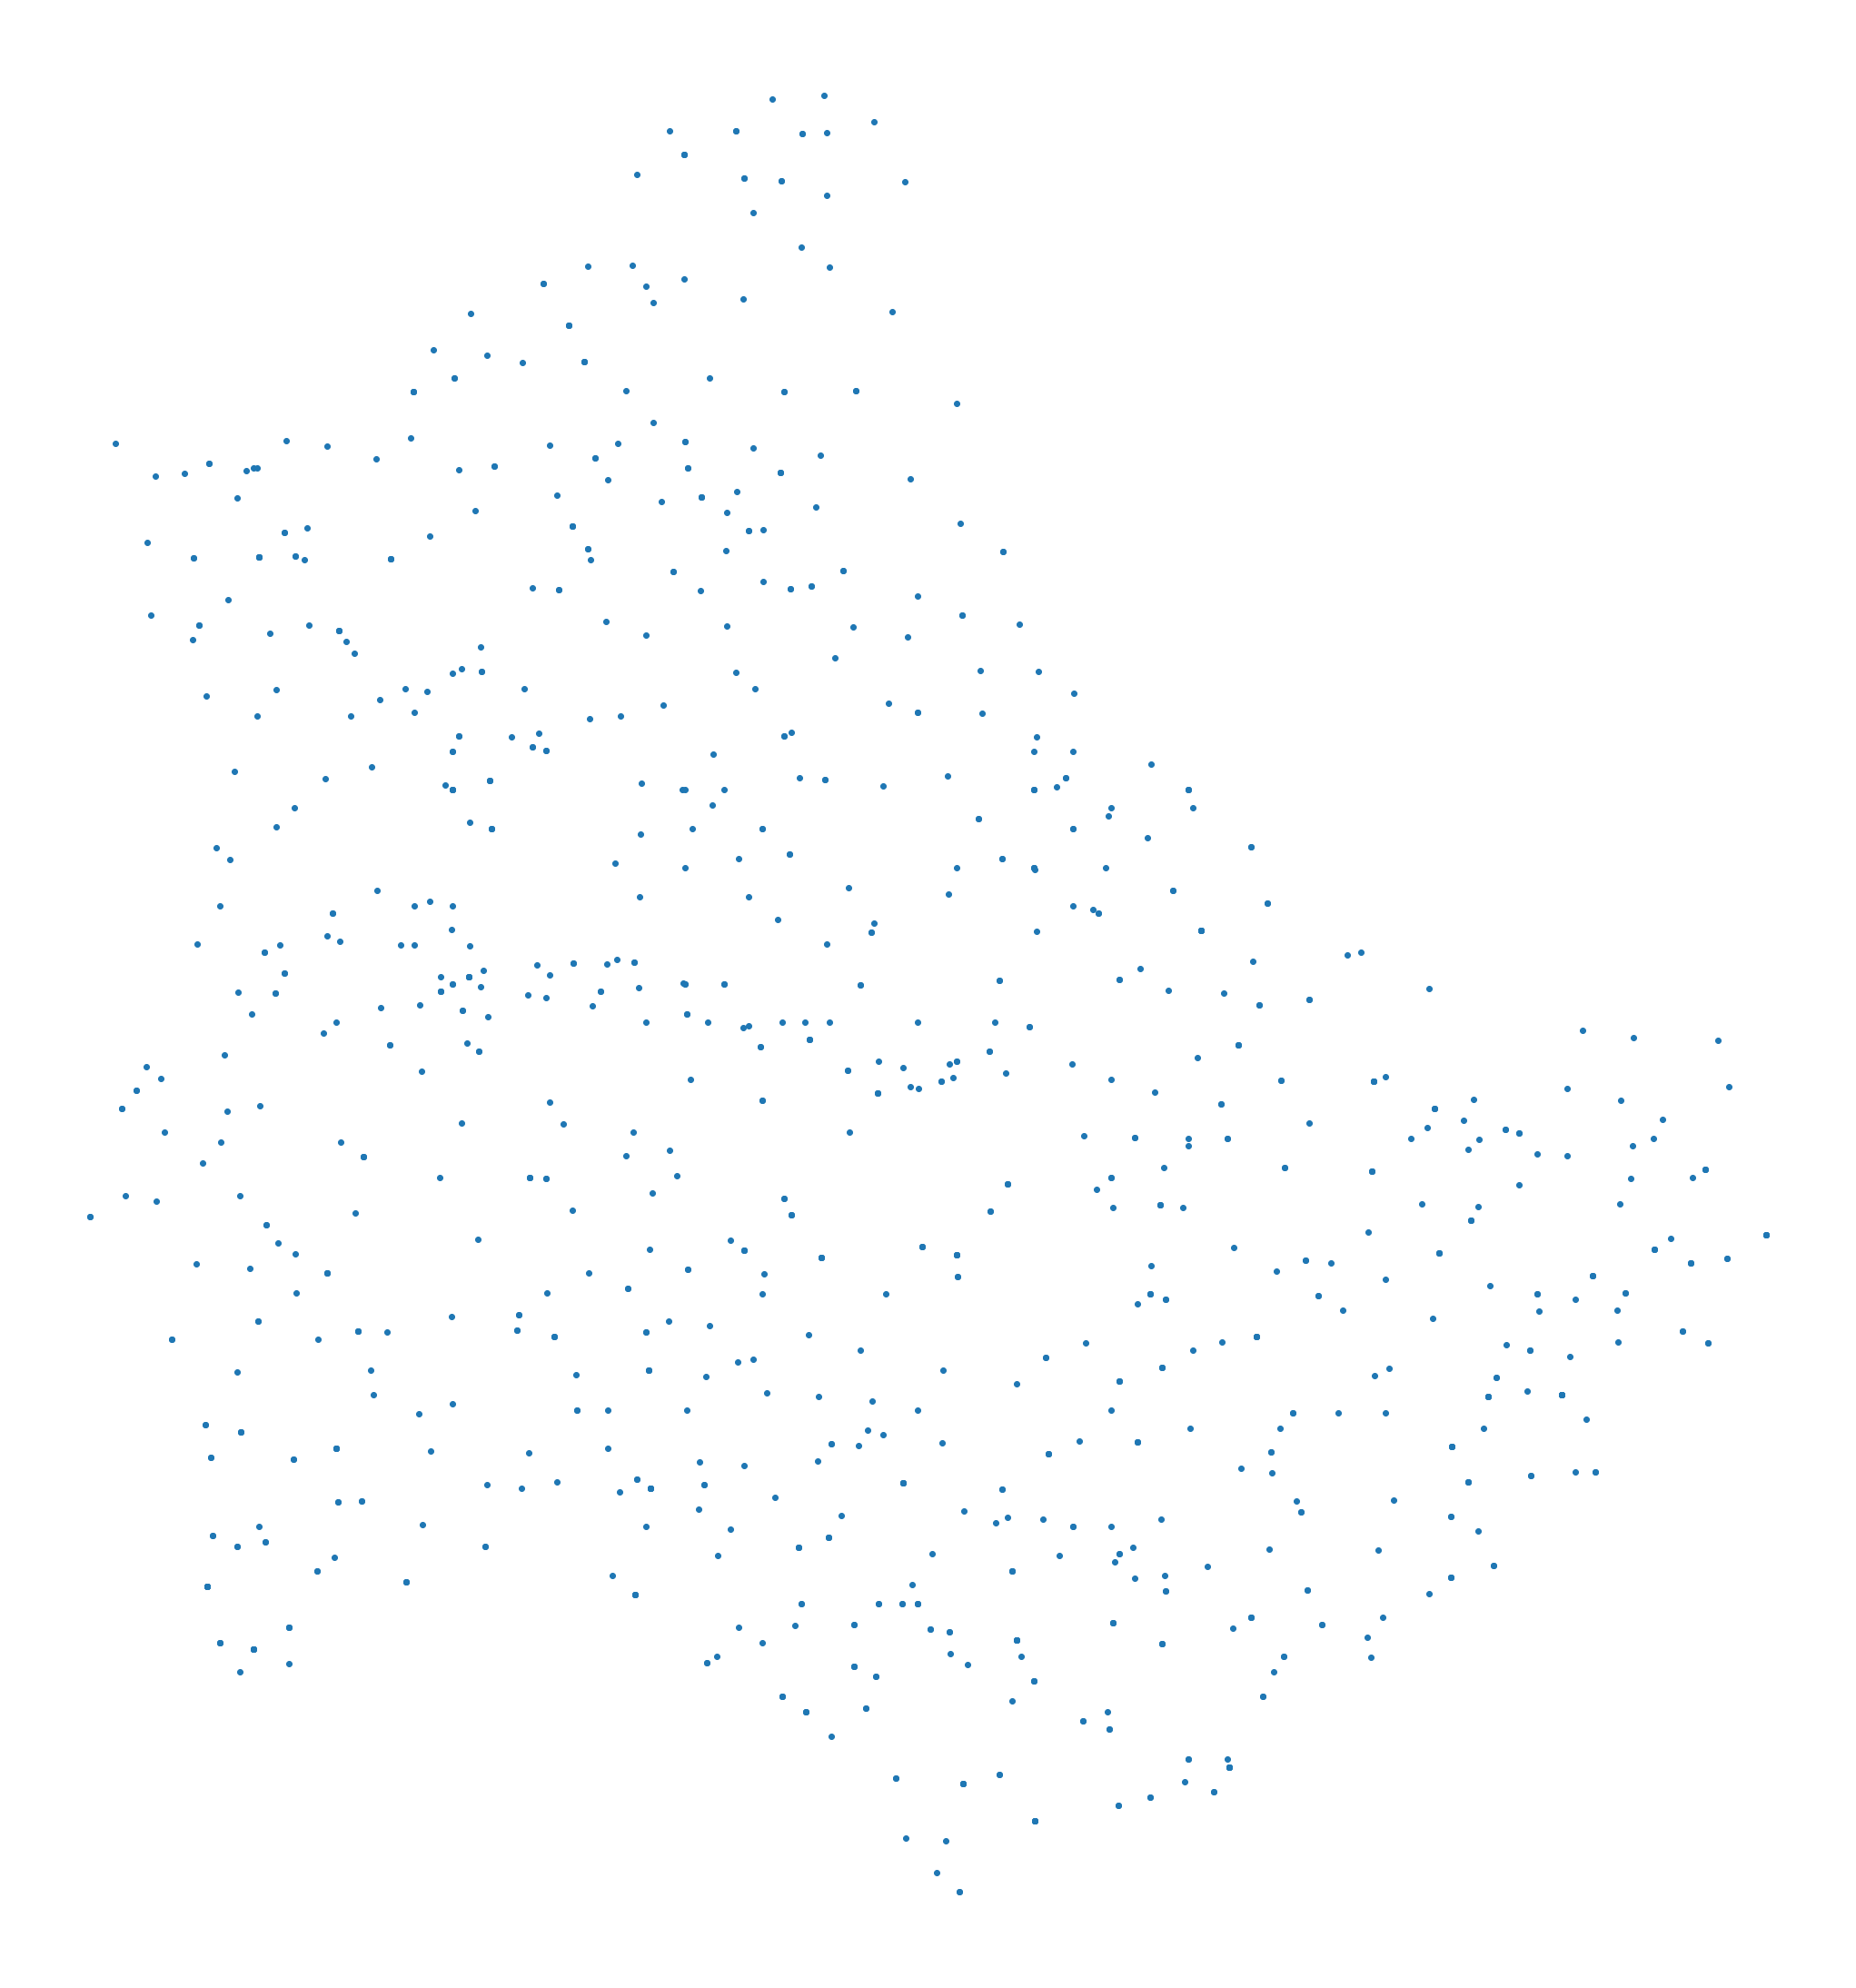

In [3]:
matrix = np.zeros(shape=(980,2))
print('Creando visualización de ciudades de luxemburgo')
for i in range(0,980):
    matrix[i][0] = data['x'][i]
    matrix[i][1] = data['y'][i]
plt.figure(figsize=(40,40));
plt.plot([p[0] for p in matrix], [p[1] for p in matrix], 'o');
plt.axis('scaled');
plt.axis("off");
plt.show();

Mapa de Luxemburgo con las 980 Ubicaciones
![](Images/lux980.png)

In [4]:
print("Creando Arreglo de localizaciones")
locations = [ (data['x'][i], data['y'][i]) for i in range(0,980)];

Creando Arreglo de localizaciones


In [5]:
fitness_coords = mlrose.TravellingSales(coords = locations)

In [6]:
problem_fit = mlrose.TSPOpt(length = 980, fitness_fn = fitness_coords,maximize=False)

In [7]:
#arr= []
#for i in range(1,10):
#    mut_prob = i/10.0;
#    for max_at in range(10,100,20):
#        random = randint(0,1e6)
#        start_time = time.time()
#        best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = random, mutation_prob = mut_prob, max_attempts = max_at)
#        elapsed_time = time.time() - start_time
#        data = {"algorithm":"genetic_alg","mutation_rate": mut_prob, "max_attempts":max_at, "best_fitness":best_fitness, "best_route":best_state, "time": elapsed_time, "randomize": random}
#        print("Se ha terminado el algoritmo con: p="+str(mut_prob)+", max_attempt="+str(max_at)+" duration (s)="+str(elapsed_time))
#        arr.append(data)

In [230]:
schedule = mlrose.ExpDecay()
start_time = time.time()
best_state, best_fitness =  mlrose.simulated_annealing(problem_fit, schedule = schedule, max_attempts=30, max_iters=5000, random_state=149634)
elapsed_time = time.time() - start_time
best_fitness

178321.32424755723

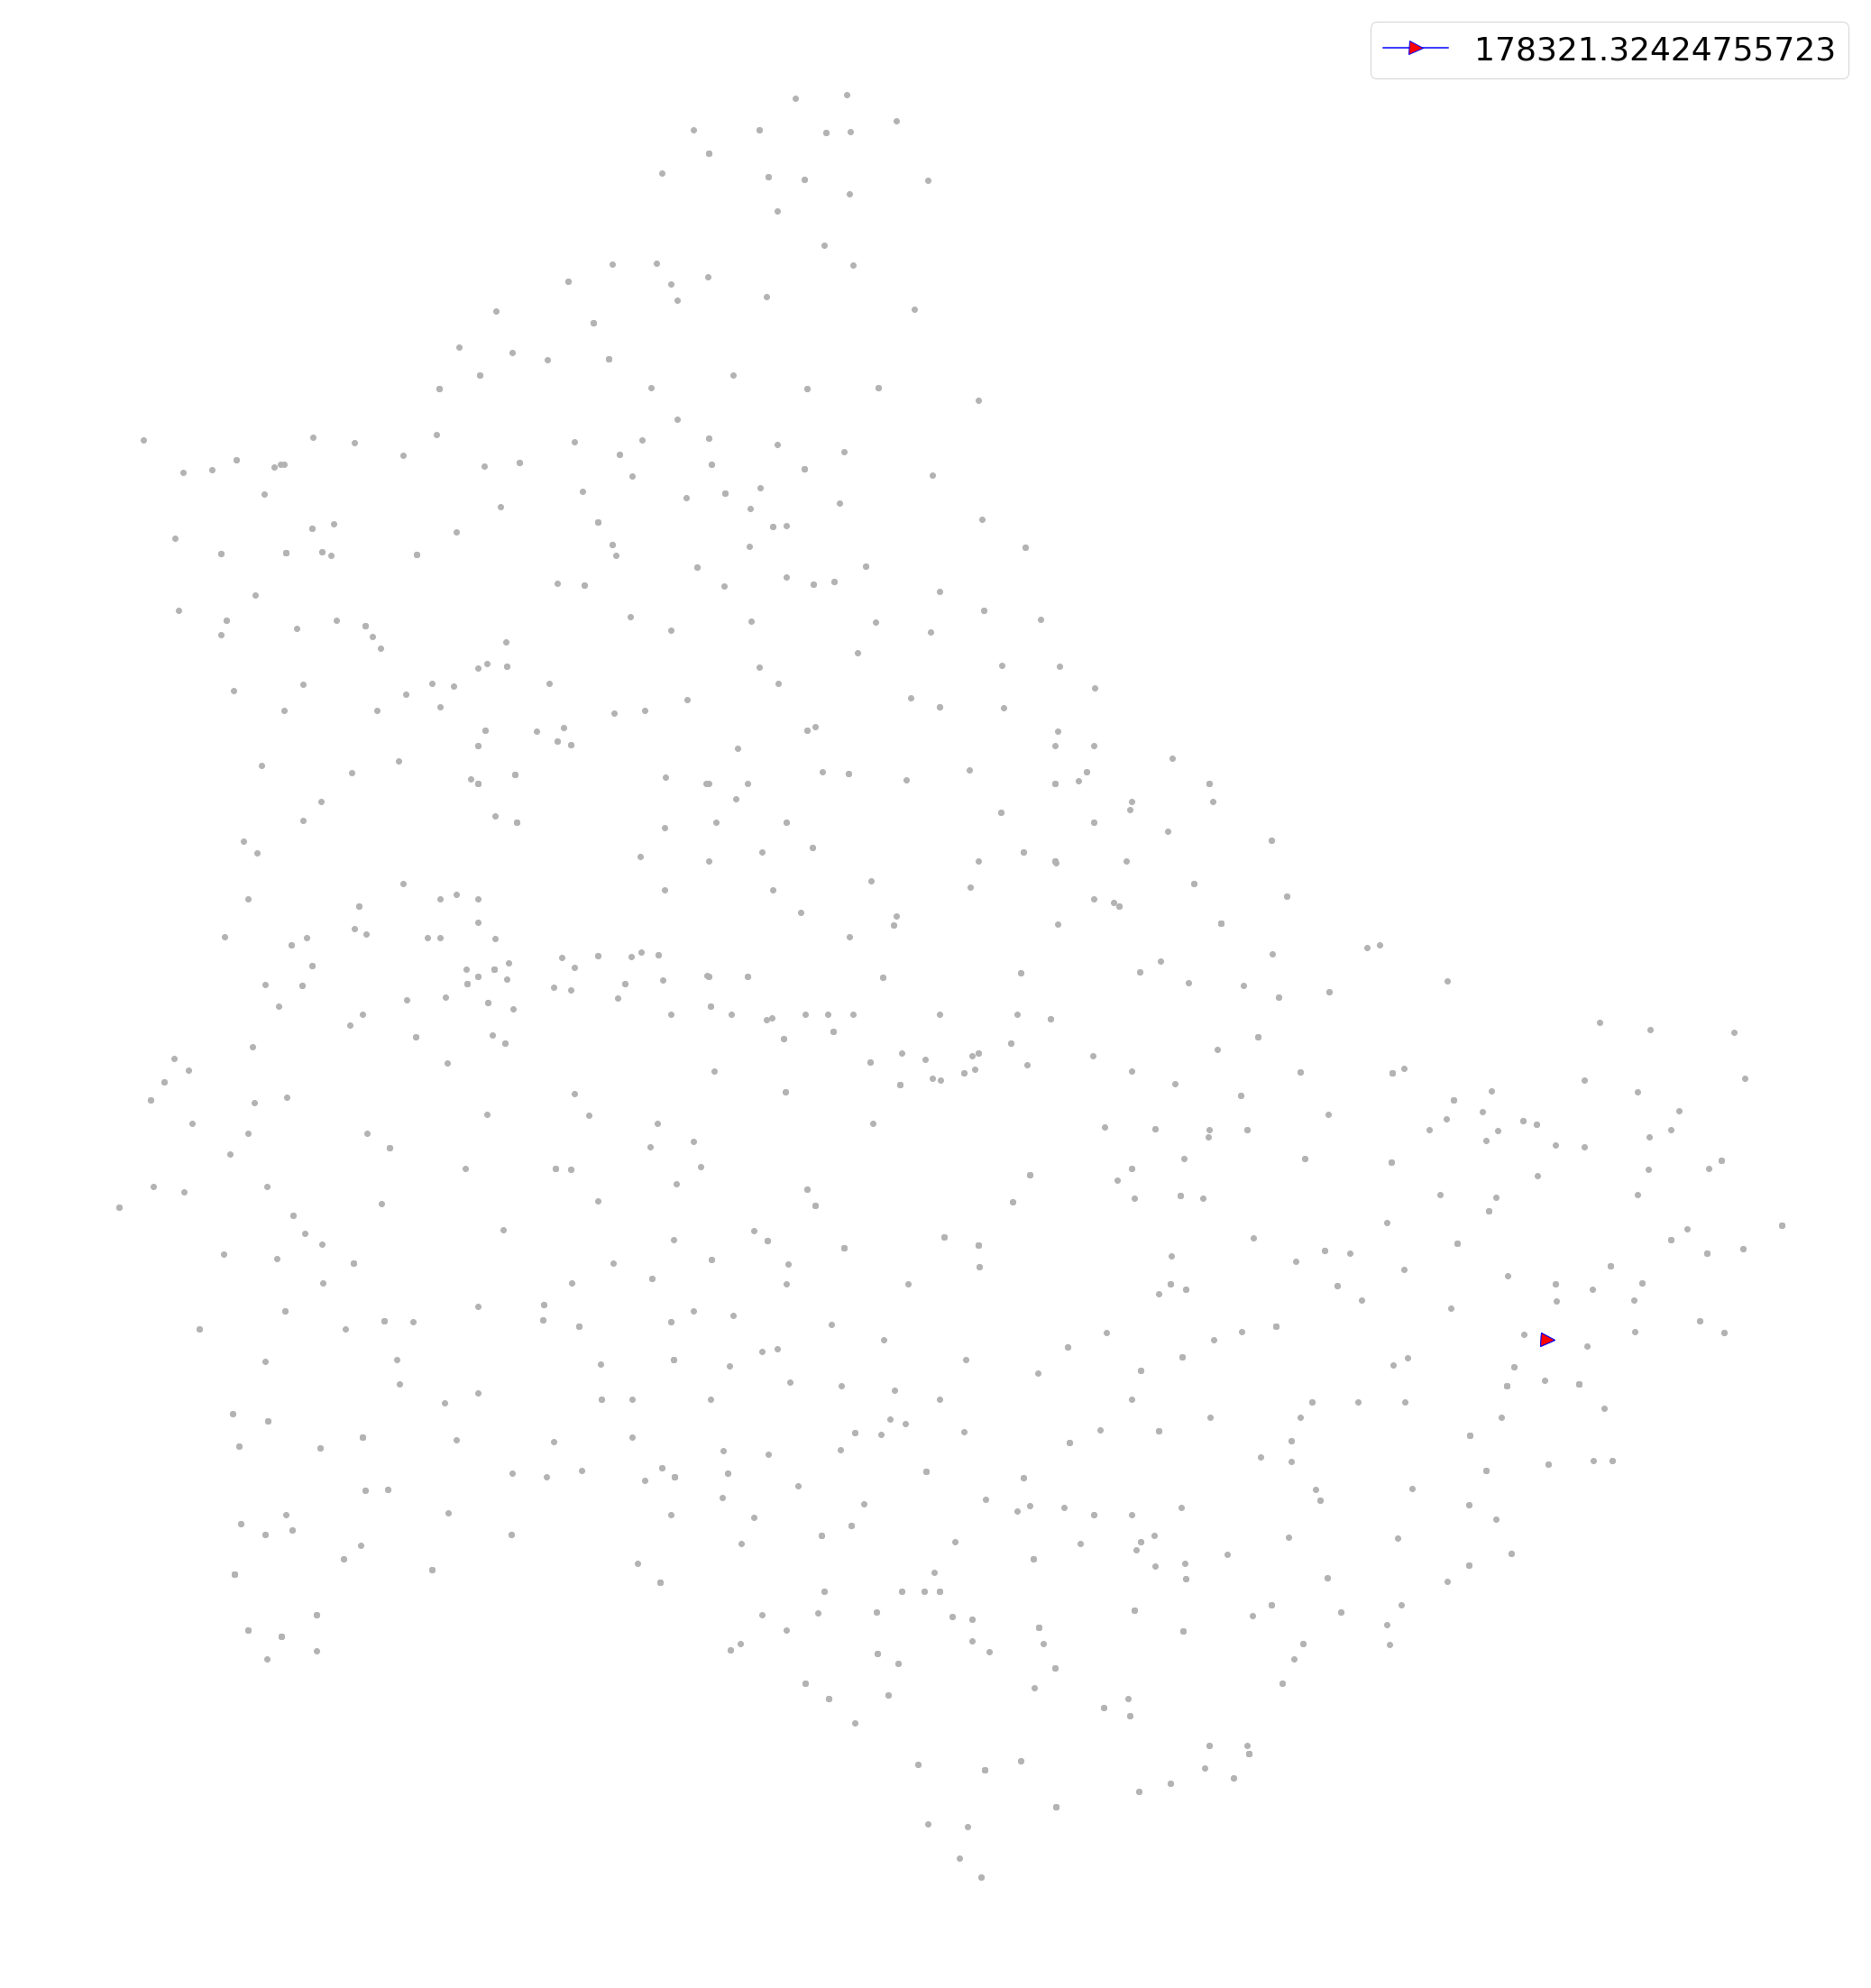

In [231]:
tour = []
for i in range(0, len(best_state)):
    tour.append((matrix[best_state[i]][0],matrix[best_state[i]][1]))
x = np.asarray([p[0] for p in tour])
y = np.asarray([p[1] for p in tour])
fig = plt.figure(figsize=(40,40));
dist = 0
graph, = plt.plot([], [], 'bo-', linewidth=1.5, label=dist, markersize=5)
plt.plot(x,y,'o',color="#b3b3b3",zorder=0)
plt.axis('off')
plt.axis('scaled')
x_init = x[0]
y_init = y[0]
def animate(i):
    global dist 
    global x_init
    global y_init
    dist += distance(x_init,y_init, x[i], y[i])
    graph.set_label(dist)
    x_init = x[i]
    y_init = y[i]
    graph.set_data(x[:i+1], y[:i+1])
    graph.set_marker('>')
    graph.set_markersize(15)
    graph.set_markevery(every=[0,i])
    graph.set_markerfacecolor('red')
    plt.legend(prop={'size': 36})
    return graph

def distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

ani2 = FuncAnimation(fig, animate, frames=980, interval=100)
ani2.save('best_route_found.mp4',writer='ffmpeg',extra_args=['-loglevel','verbose'])